In [1]:
import numpy as np 
import torch
import pandas as pd
import package.compute_procrustes as compute_procrustes
import package.dataset as dataset
import package.models as models
import package.training as training
from sklearn.model_selection import train_test_split
import importlib
import matplotlib.pyplot as plt
from sklearn.preprocessing import Normalizer
import sys
sys.path.append("/users/eleves-b/2020/aurelien.stumpf-mascles/Code/ICM_internship/visualize_neural_network")
import VisualizeNN as VisNN

/tmp/ipykernel_95146/1628620950.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [39]:
importlib.reload(dataset)
importlib.reload(models)
importlib.reload(training)
importlib.reload(VisNN)
importlib.reload(compute_procrustes)

<module 'package.compute_procrustes' from '/users/eleves-b/2020/aurelien.stumpf-mascles/Code/ICM_internship/experiment_1/package/compute_procrustes.py'>

## Loading dataset

In [8]:
#synthetic function 
def f(x):
    return np.sum(x**2)

In [2]:
X = np.random.normal(0, 5, (1000, 10))
y = (X[:, 0]+X[:, 1]) + 10

In [3]:
#normalizer = Normalizer()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = torch.tensor(X_train, dtype=torch.float32)
#X_train = normalizer.fit_transform(X_train)
X_test = torch.tensor(X_test, dtype=torch.float32)
#X_test = normalizer.transform(X_test)
y_train = torch.tensor(y_train, dtype=torch.float32).reshape(-1, 1)
y_test = torch.tensor(y_test, dtype=torch.float32).reshape(-1, 1)

In [4]:
trainset = dataset.Dataset(X_train, y_train)
testset = dataset.Dataset(X_test, y_test)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=32, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=32, shuffle=True)

## Training

In [7]:
layer_sizes_list = [10, 5, 5, 3, 1]

def f(x):
    return x

model = models.Model_MLP(layer_sizes_list, non_linearity="relu", initial_weights='xavier')
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.1, weight_decay=1)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=30, verbose=True, factor=0.5)
training.train_model(model, trainloader, testloader, device, criterion, 300, optimizer, scheduler=scheduler)

Epoch 0
lr:  0.1
Training Loss
1.1771700763702393
Test Loss
Loss: 0.4614434385299683
-------------------------
Epoch 10
lr:  0.1
Training Loss
0.33715518355369567
Test Loss
Loss: 0.37127493381500243
-------------------------
Epoch 20
lr:  0.1
Training Loss
0.2936317682266235
Test Loss
Loss: 0.3973376989364624
-------------------------
Epoch 30
lr:  0.1
Training Loss
0.48509010136127473
Test Loss
Loss: 0.45220723628997805
-------------------------
Epoch 40
lr:  0.1
Training Loss
0.2835140335559845
Test Loss
Loss: 0.4082494735717773
-------------------------
Epoch 50
lr:  0.1
Training Loss
0.2317801895737648
Test Loss
Loss: 0.28737726449966433
-------------------------
Epoch 60
lr:  0.1
Training Loss
0.14605714231729508
Test Loss
Loss: 0.2286776375770569
-------------------------
Epoch 70
lr:  0.1
Training Loss
0.11637409225106239
Test Loss
Loss: 0.15508577227592468
-------------------------
Epoch 80
lr:  0.1
Training Loss
0.13204947903752326
Test Loss
Loss: 0.19889291286468505
---------

In [15]:
for layer in model.named_parameters():
    print(layer[0])
    print(layer[1].data.type())

l1.weight
torch.cuda.DoubleTensor
l1.bias
torch.cuda.FloatTensor
l2.weight
torch.cuda.DoubleTensor
l2.bias
torch.cuda.FloatTensor
l3.weight
torch.cuda.DoubleTensor
l3.bias
torch.cuda.FloatTensor
l4.weight
torch.cuda.DoubleTensor
l4.bias
torch.cuda.FloatTensor


In [13]:
layer_sizes_list = [10, 8, 5, 3, 1]

def f(x):
    return x

model = models.Model_MLP(layer_sizes_list, non_linearity="relu", initial_weights='xavier')
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.1, weight_decay=0.1)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=20, verbose=True, factor=0.5)
training.train_model_orthogonal(model, trainloader, testloader, device, criterion, 300, optimizer, scheduler=scheduler, degree_threshold = 1)

/users/eleves-b/2020/aurelien.stumpf-mascles/Code/env/lib64/python3.9/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Epoch 0
lr:  0.1
Training Loss
2.9246966004371644
Test Loss
Loss: 0.8012881088256836
-------------------------
Epoch 10
lr:  0.1
Training Loss
0.05000761281698942
Test Loss
Loss: 0.07644597232341767
-------------------------
Epoch 20
lr:  0.1
Training Loss
0.025894654458388688
Test Loss
Loss: 0.04318704754114151
-------------------------
Epoch 30
lr:  0.1
Training Loss
0.02742151288315654
Test Loss
Loss: 0.05063812986016274
-------------------------
Epoch 40
lr:  0.1
Training Loss
0.06706450693309307
Test Loss
Loss: 0.08636543691158295
-------------------------
Epoch 50
lr:  0.05
Training Loss
0.015026979404501617
Test Loss
Loss: 0.028648129301145672
-------------------------
Epoch 60
lr:  0.05
Training Loss
0.05411854073405266
Test Loss
Loss: 0.058347943127155306
-------------------------
Epoch 70
lr:  0.05
Training Loss
0.027931554466485976
Test Loss
Loss: 0.04380823701620102
-------------------------
Epoch 80
lr:  0.025
Training Loss
0.013899434839331662
Test Loss
Loss: 0.0261149930

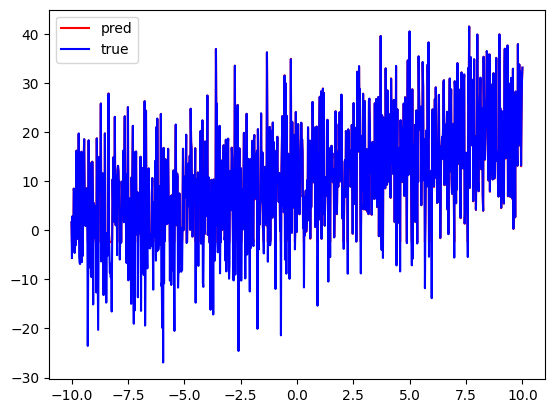

In [14]:
tab = np.concatenate([np.linspace(-10,10,1000).reshape(-1,1), np.random.normal(0, 10, (1000,9))], axis=1)
y = np.array([x[0]+x[1]+10 for x in tab])
tab = torch.tensor(tab, dtype=torch.float32)
tab = tab.to(device)
model.eval()
pred = model(tab).detach().cpu().numpy()
plt.plot(np.linspace(-10,10,1000), pred, label='pred', color='red')
plt.plot(np.linspace(-10,10,1000), y, label='true', color='blue')
plt.legend()
plt.show()

## Visualization 

l1.weight


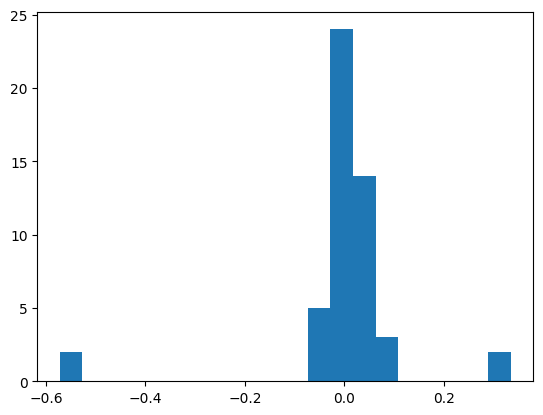

l1.bias


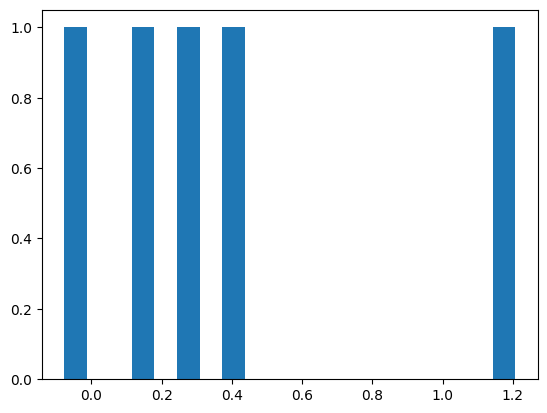

l2.weight


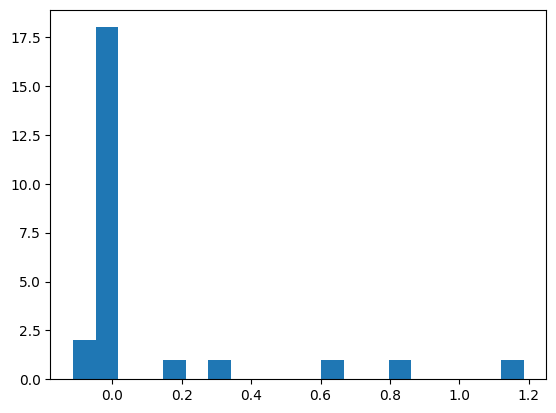

l2.bias


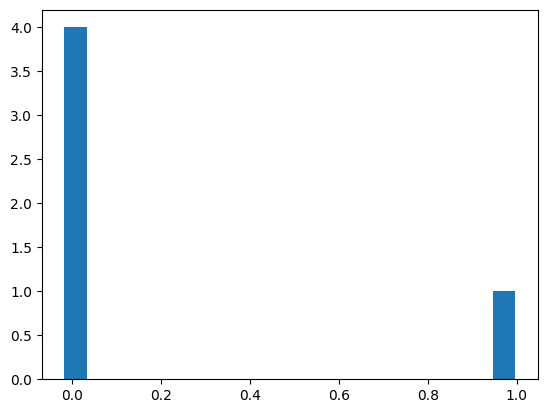

l3.weight


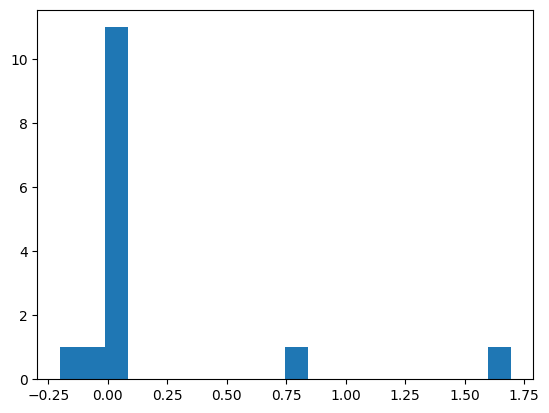

l3.bias


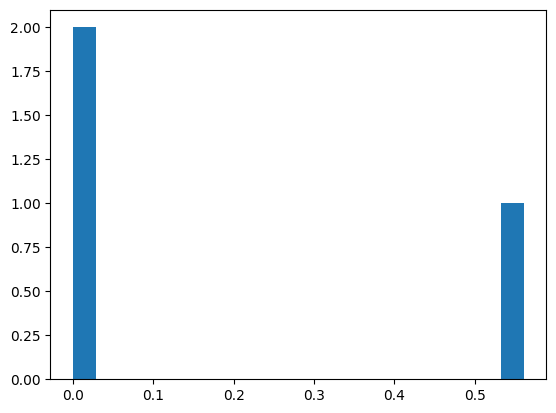

l4.weight


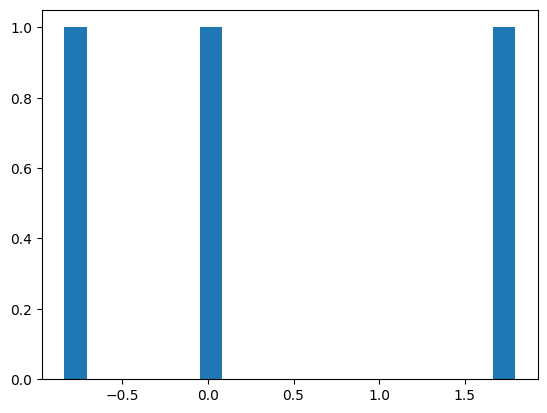

l4.bias


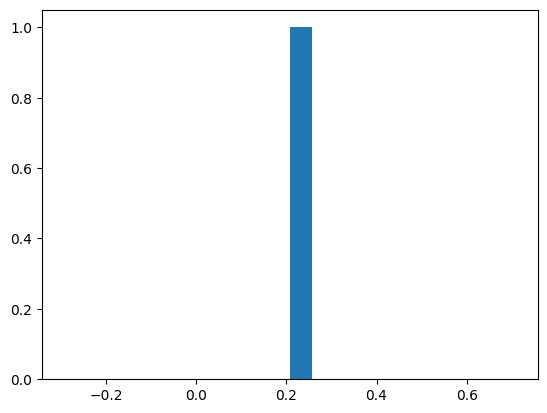

In [26]:
for layer in model.named_parameters():
    weights = layer[1].data.cpu().numpy()
    print(f'{layer[0]}')
    plt.hist(weights.flatten(), bins=20)
    plt.show()

layer0
degree_out


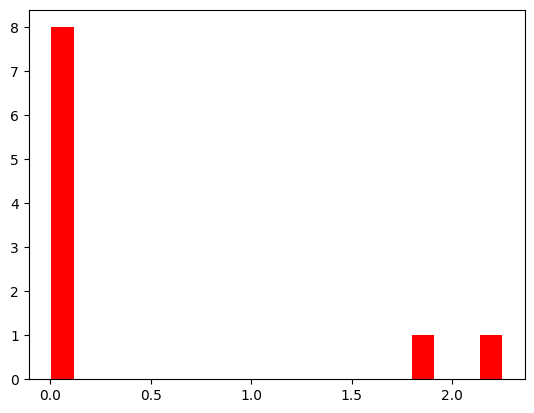

layer1
degree_in


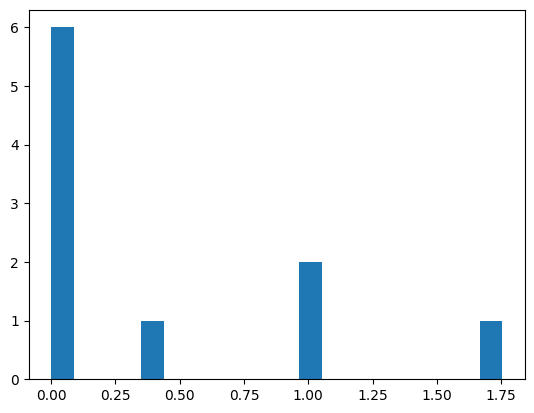

degree_out


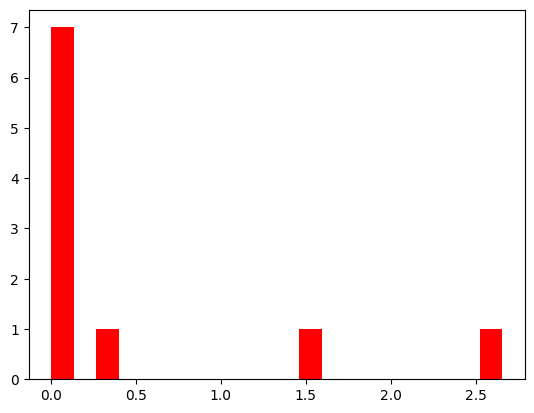

layer2
degree_in


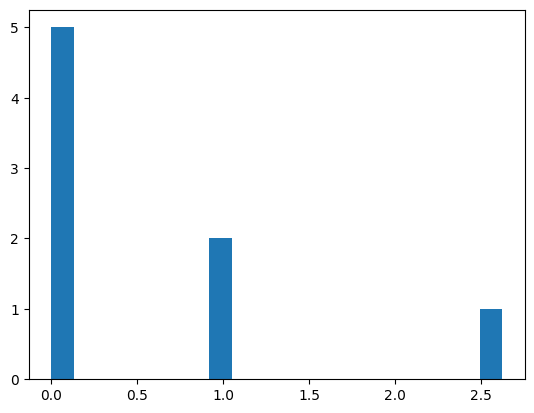

degree_out


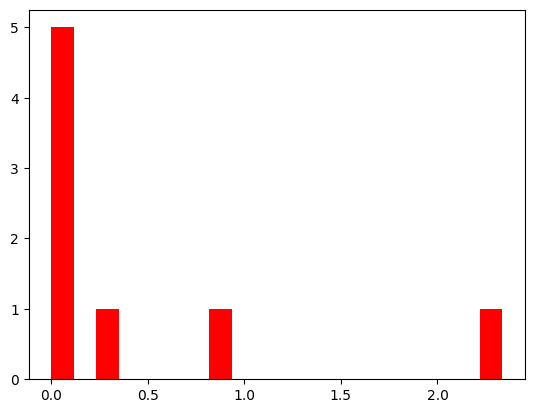

layer3
degree_in


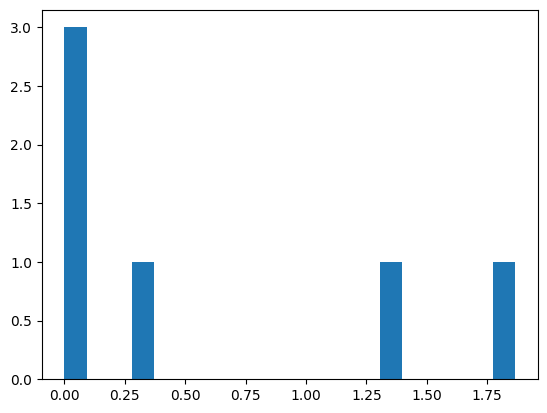

degree_out


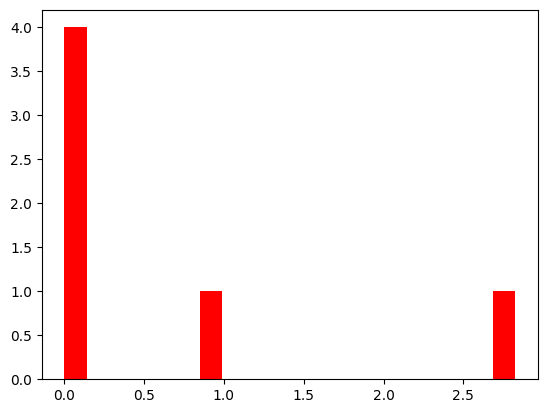

layer4
degree_in


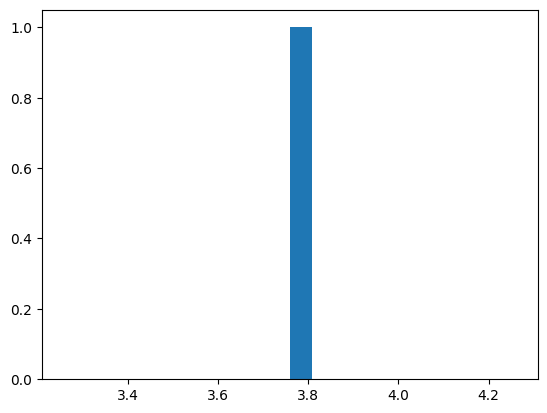

In [309]:
i=0
for layer in model.named_parameters():
    weights = layer[1].data.cpu().numpy()
    if len(weights.shape) > 1:
        if i == 0:
            print("layer{}".format(i))
        degree_out = np.sum(np.abs(weights), axis=0)
        print("degree_out")
        plt.hist(degree_out, bins=20, color='red')
        plt.show()
        i += 1
        if i > 0:
            print("layer{}".format(i))
        print("degree_in")
        degree_in = np.sum(np.abs(weights), axis=1)
        plt.hist(degree_in, bins=20)
        plt.show()

layer0
degree_out


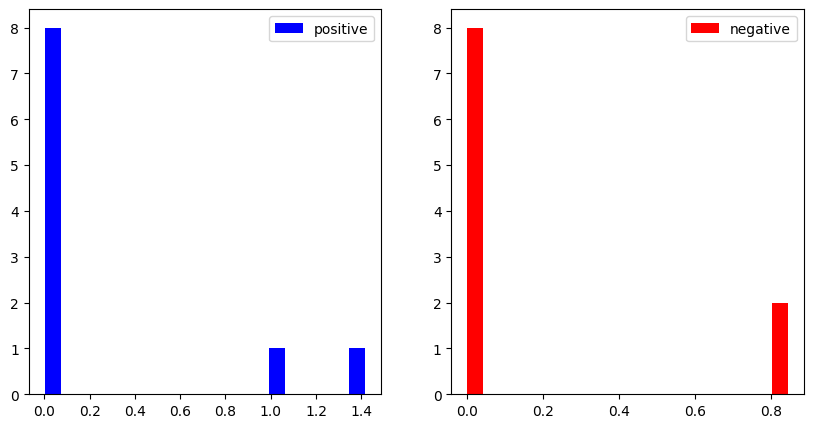

layer1
degree_in


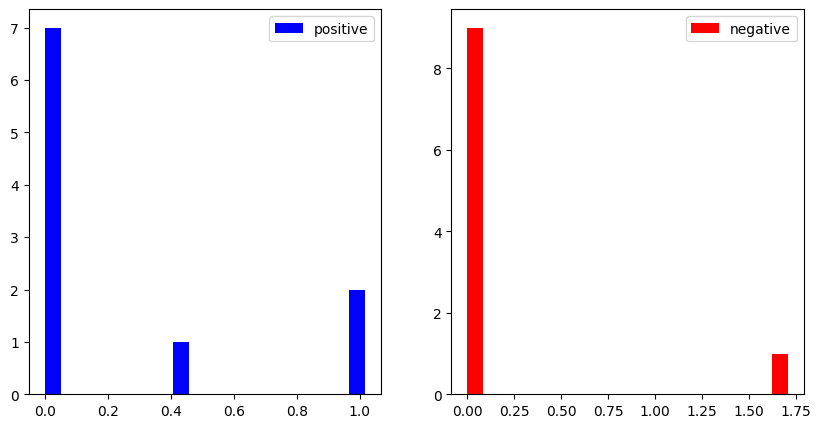

degree_out


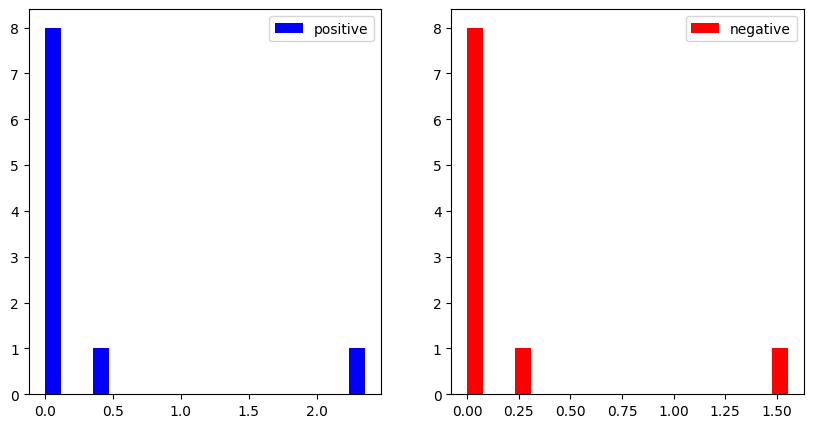

layer2
degree_in


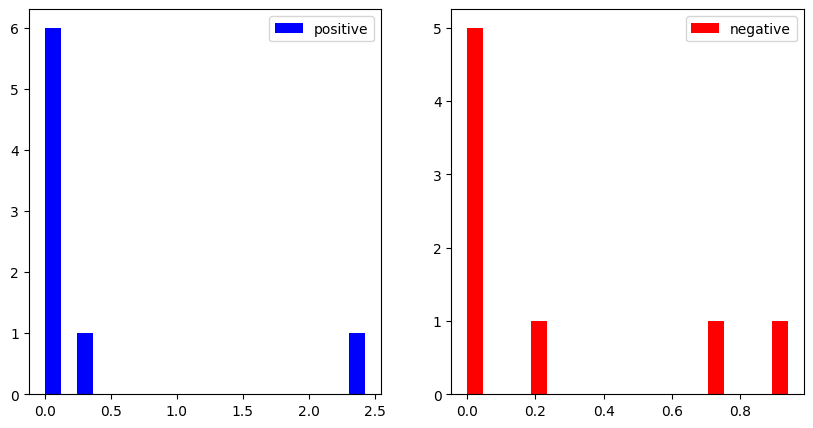

degree_out


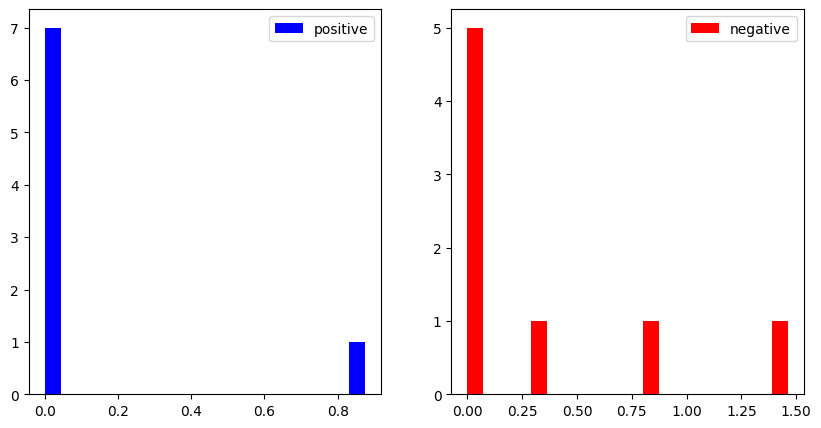

layer3
degree_in


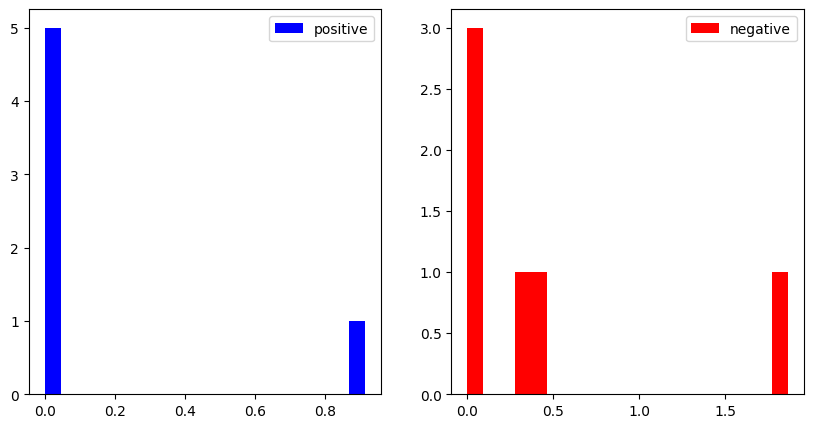

degree_out


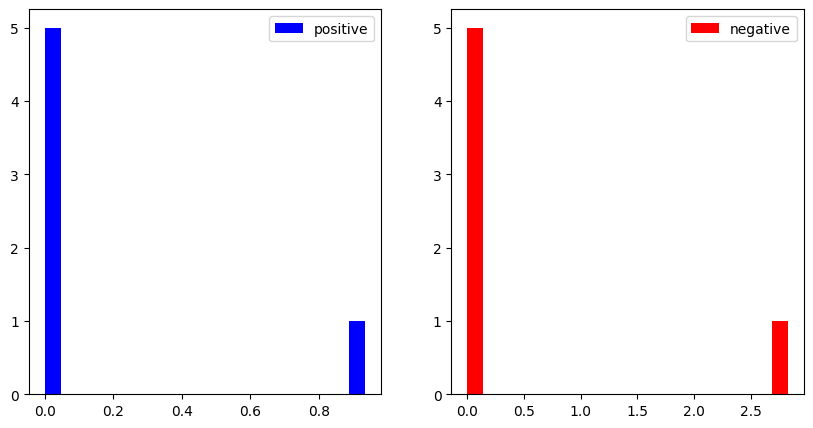

layer4
degree_in


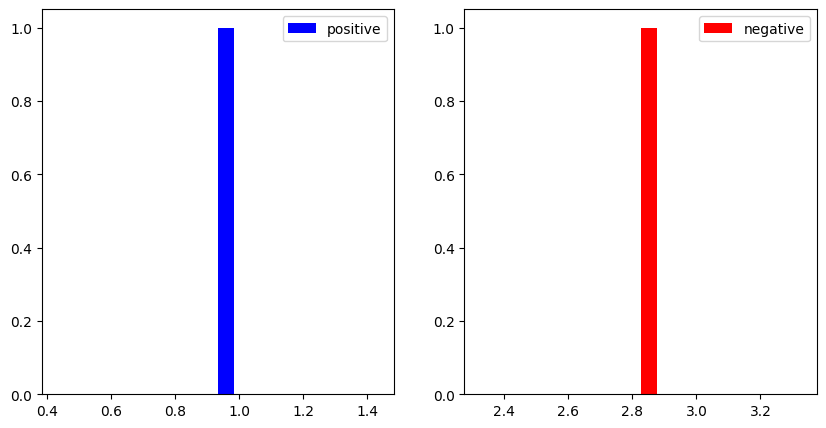

In [318]:
i=0
for layer in model.named_parameters():
    weights = layer[1].data.cpu().numpy()
    if len(weights.shape) > 1:
        neg_weights = np.copy(weights)
        neg_weights[neg_weights > 0] = 0
        pos_weights = np.copy(weights)
        pos_weights[pos_weights < 0] = 0
        if i == 0:
            print("layer{}".format(i))
        print("degree_out")
        degree_out_neg = np.sum(np.abs(neg_weights), axis=0)
        degree_out_pos = np.sum(np.abs(pos_weights), axis=0)
        plt.figure(figsize=(10,5))
        plt.subplot(1,2,1)
        plt.hist(degree_out_pos, bins=20, color='blue')
        plt.legend(['positive'])
        plt.subplot(1,2,2)
        plt.hist(degree_out_neg, bins=20, color='red')
        plt.legend(['negative'])
        plt.show()
        i += 1
        if i > 0:
            print("layer{}".format(i))
        print("degree_in")
        degree_in_neg = np.sum(np.abs(neg_weights), axis=1)
        degree_in_pos = np.sum(np.abs(pos_weights), axis=1)
        plt.figure(figsize=(10,5))
        plt.subplot(1,2,1)
        plt.hist(degree_in_pos, bins=20, color='blue')
        plt.legend(['positive'])
        plt.subplot(1,2,2)
        plt.hist(degree_in_neg, bins=20, color='red')
        plt.legend(['negative'])
        plt.show()

layer0
degree_out


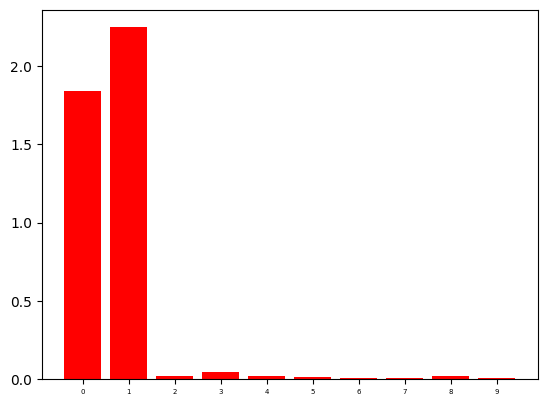

layer1
degree_in


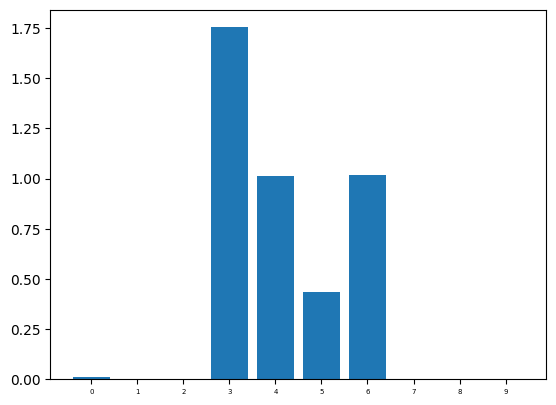

degree_out


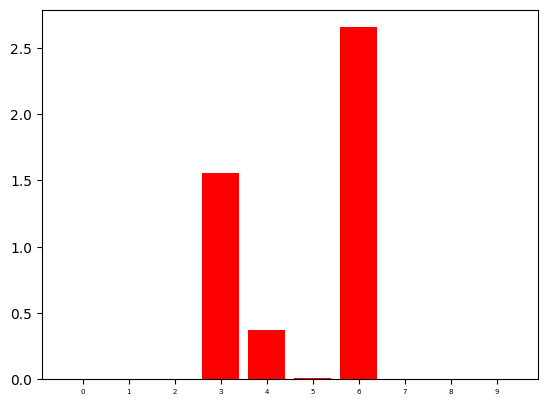

layer2
degree_in


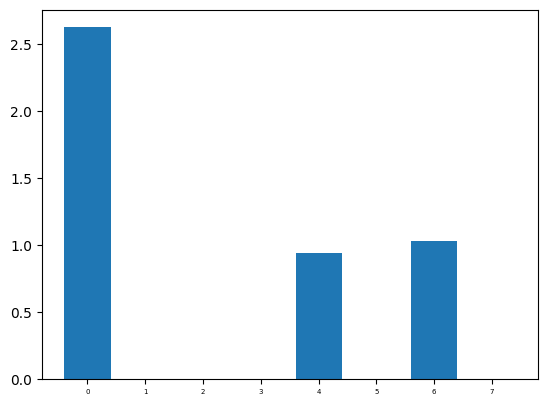

degree_out


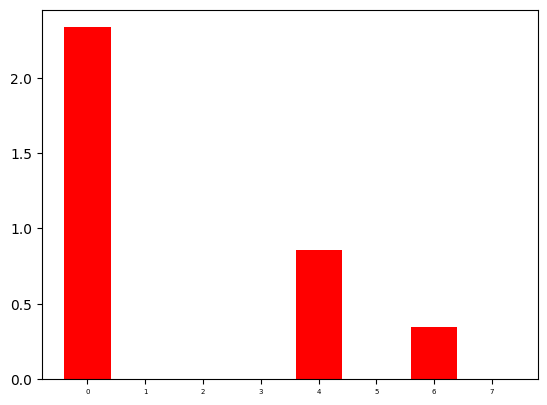

layer3
degree_in


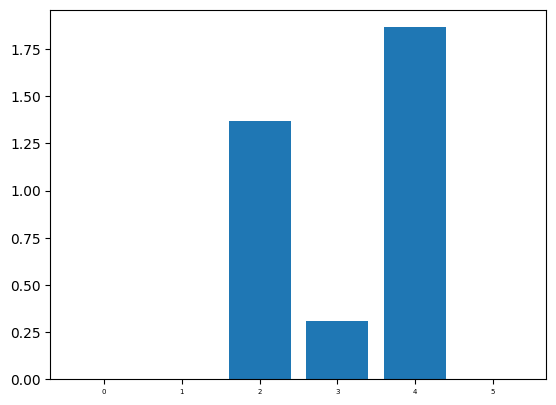

degree_out


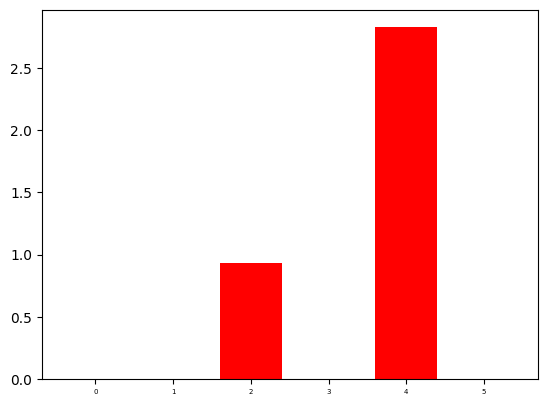

layer4
degree_in


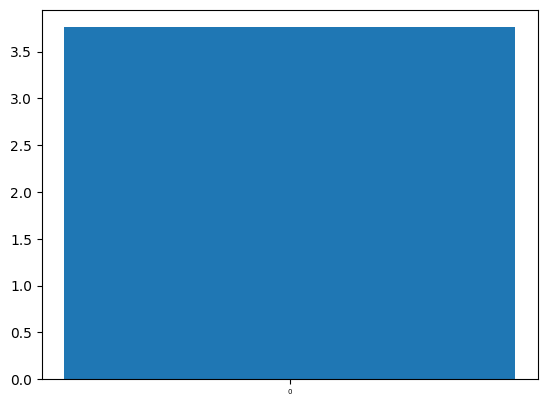

In [316]:
i=0
for layer in model.named_parameters():
    weights = layer[1].data.cpu().numpy()
    if len(weights.shape) > 1:
        if i == 0:
            print("layer{}".format(i))
        degree_out = np.sum(np.abs(weights), axis=0)
        print("degree_out")
        plt.bar(np.arange(weights.shape[1]),degree_out, color='red')
        plt.xticks(np.arange(weights.shape[1]), rotation=0, fontsize=5)
        plt.show()
        i += 1
        if i > 0:
            print("layer{}".format(i))
        print("degree_in")
        degree_in = np.sum(np.abs(weights), axis=1)
        plt.bar(np.arange(weights.shape[0]),degree_in)
        plt.xticks(np.arange(weights.shape[0]), rotation=0, fontsize=5)
        plt.show()

layer0
degree_out


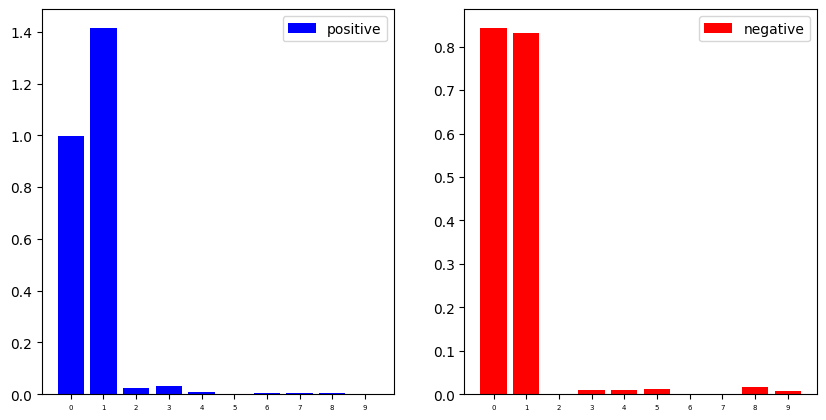

layer1
degree_in


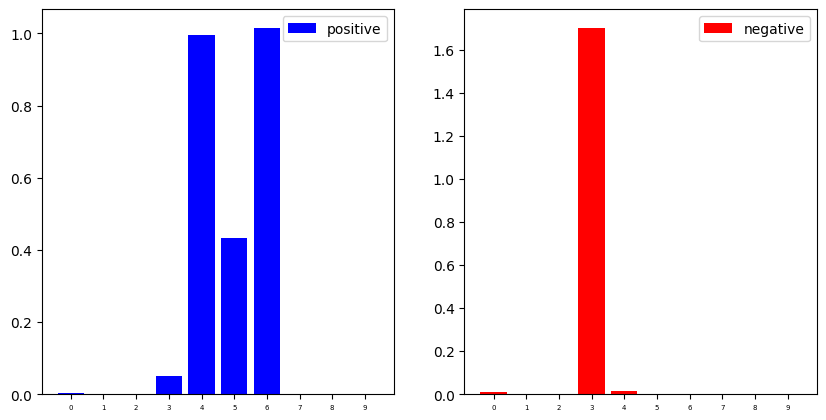

degree_out


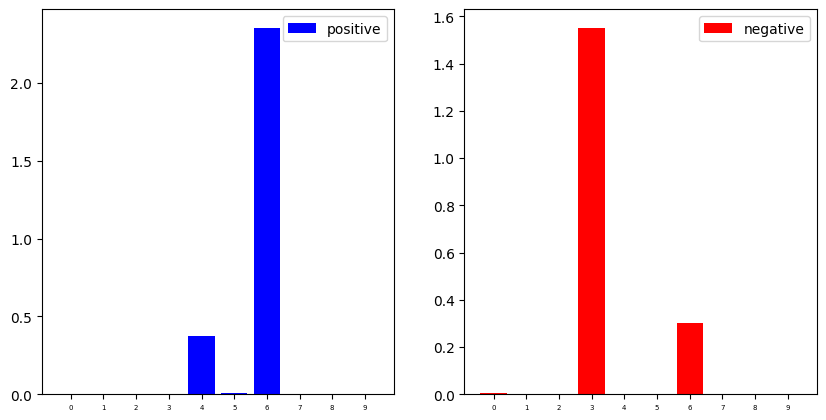

layer2
degree_in


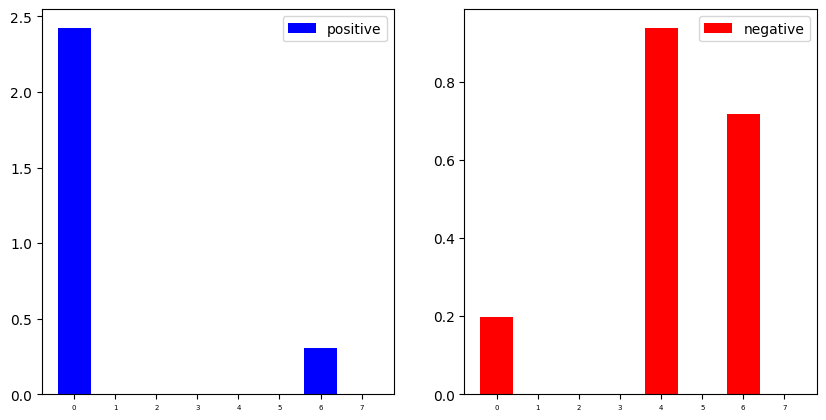

degree_out


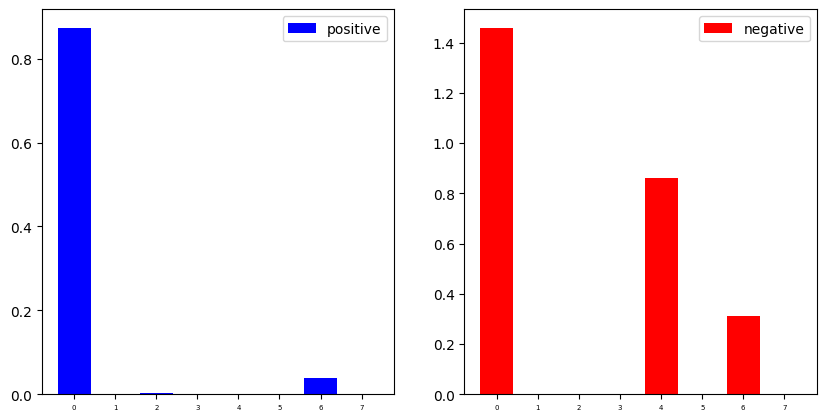

layer3
degree_in


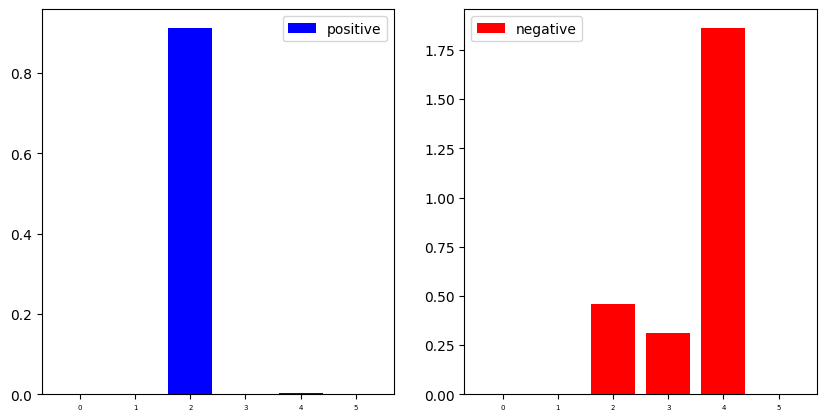

degree_out


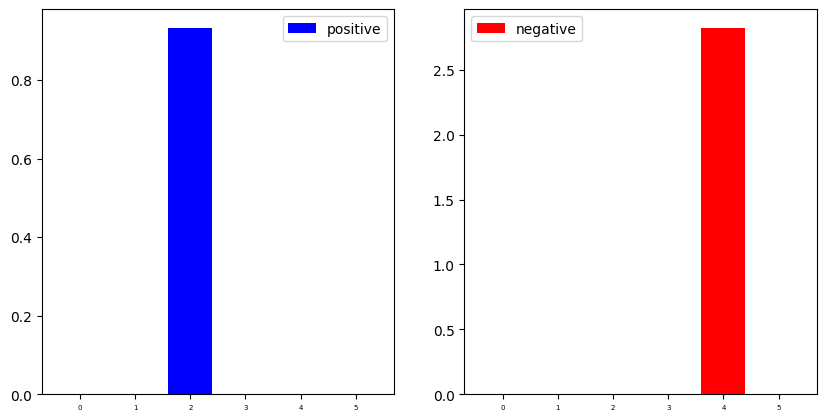

layer4
degree_in


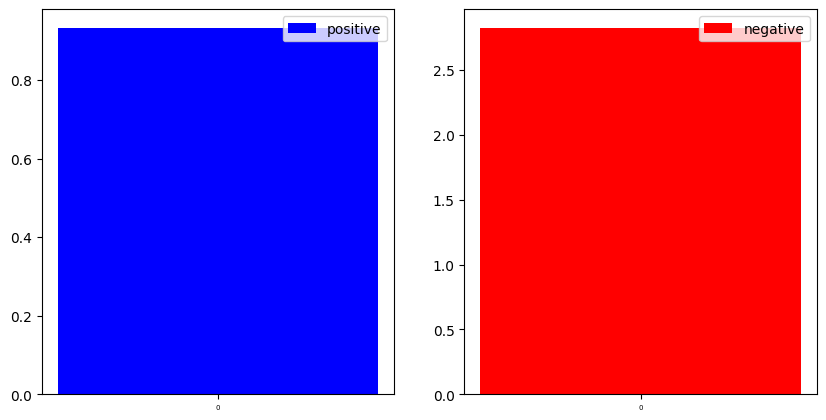

In [317]:
i=0
for layer in model.named_parameters():
    weights = layer[1].data.cpu().numpy()
    if len(weights.shape) > 1:
        if i == 0:
            print("layer{}".format(i))
        neg_weights = np.copy(weights)
        neg_weights[neg_weights > 0] = 0
        pos_weights = np.copy(weights)
        pos_weights[pos_weights < 0] = 0
        print("degree_out")
        degree_out_neg = np.sum(np.abs(neg_weights), axis=0)
        degree_out_pos = np.sum(np.abs(pos_weights), axis=0)
        plt.figure(figsize=(10,5))
        plt.subplot(1,2,1)
        plt.bar(np.arange(weights.shape[1]),degree_out_pos, color='blue')
        plt.xticks(np.arange(weights.shape[1]), rotation=0, fontsize=5)
        plt.legend(['positive'])
        plt.subplot(1,2,2)
        plt.bar(np.arange(weights.shape[1]),degree_out_neg, color='red')
        plt.xticks(np.arange(weights.shape[1]), rotation=0, fontsize=5)
        plt.legend(['negative'])
        plt.show()
        i += 1
        if i > 0:
            print("layer{}".format(i))
        print("degree_in")
        degree_in_neg = np.sum(np.abs(neg_weights), axis=1)
        degree_in_pos = np.sum(np.abs(pos_weights), axis=1)
        plt.figure(figsize=(10,5))
        plt.subplot(1,2,1)
        plt.bar(np.arange(weights.shape[0]),degree_in_pos, color='blue')
        plt.xticks(np.arange(weights.shape[0]), rotation=0, fontsize=5)
        plt.legend(['positive'])
        plt.subplot(1,2,2)
        plt.bar(np.arange(weights.shape[0]),degree_in_neg, color='red')
        plt.xticks(np.arange(weights.shape[0]), rotation=0, fontsize=5)
        plt.legend(['negative'])
        plt.show()

# Visualization

In [10]:
def get_model_params(model):
    params = []
    for layer in model.named_parameters():
        if "weight" in layer[0]:
            params.append(layer[1].cpu().detach().numpy().T)
    return params

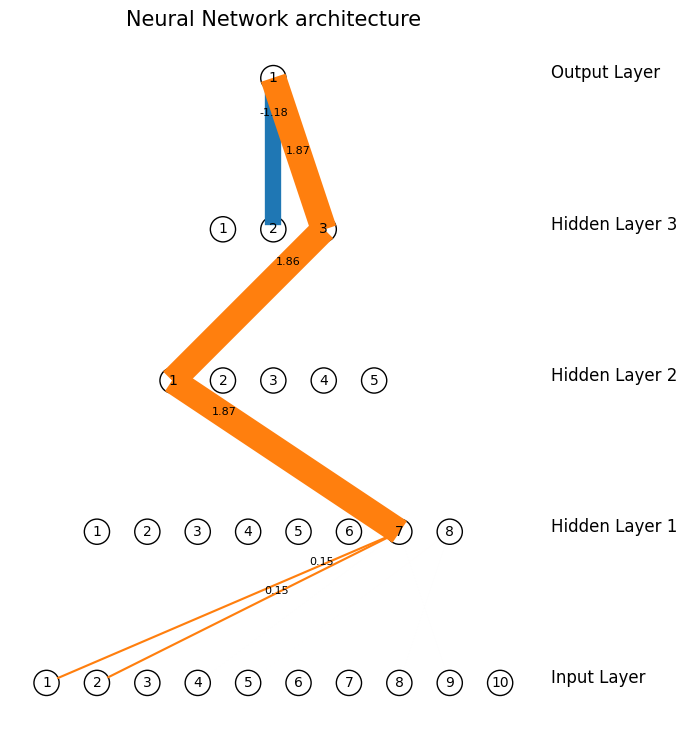

In [16]:
l = get_model_params(model)
network_structure = layer_sizes_list
network=VisNN.DrawNN(network_structure, l, 0.1, 10)
network.draw()

In [12]:
for layer in model.named_parameters():
    W = layer[1].data.cpu().numpy()
    print(W @ W.T)

[[ 1.1610831e-01  3.1834571e-10  1.1570526e-08 -1.8815871e-10
   6.7522521e-09 -1.5819982e-09  2.7221696e-09  1.1420183e-10]
 [ 3.1834571e-10  4.5008040e-03  1.2950527e-09 -1.0403400e-11
  -2.5955310e-10 -4.8481719e-11 -1.2037388e-10 -2.3228934e-11]
 [ 1.1570526e-08  1.2950527e-09  1.8714347e+00 -7.3290085e-10
  -1.0568367e-08 -2.5235664e-08  3.4045804e-08 -4.7169957e-10]
 [-1.8815871e-10 -1.0403400e-11 -7.3290085e-10  3.3434588e-02
  -1.1426666e-09  6.8107719e-10 -2.6925260e-09  1.1999422e-11]
 [ 6.7522521e-09 -2.5955310e-10 -1.0568367e-08 -1.1426666e-09
   4.1542315e-01 -8.3738128e-11  1.2908397e-08  8.1089670e-11]
 [-1.5819982e-09 -4.8481719e-11 -2.5235664e-08  6.8107719e-10
  -8.3738128e-11  6.0095918e-01 -2.4802411e-08  1.5178719e-10]
 [ 2.7221696e-09 -1.2037388e-10  3.4045804e-08 -2.6925260e-09
   1.2908397e-08 -2.4802411e-08  7.2613978e+00 -7.3297890e-10]
 [ 1.1420183e-10 -2.3228934e-11 -4.7169957e-10  1.1999422e-11
   8.1089670e-11  1.5178719e-10 -7.3297890e-10  3.1702340e-04]]

In [24]:
importlib.reload(compute_procrustes)
from scipy.stats import ortho_group

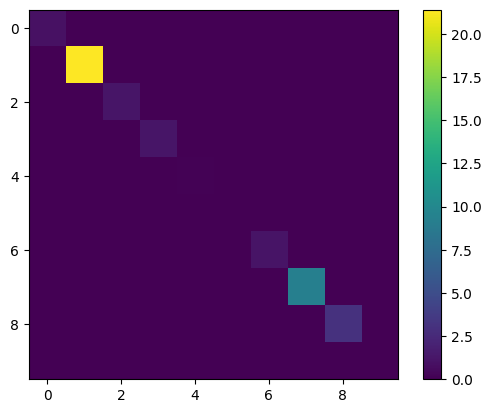

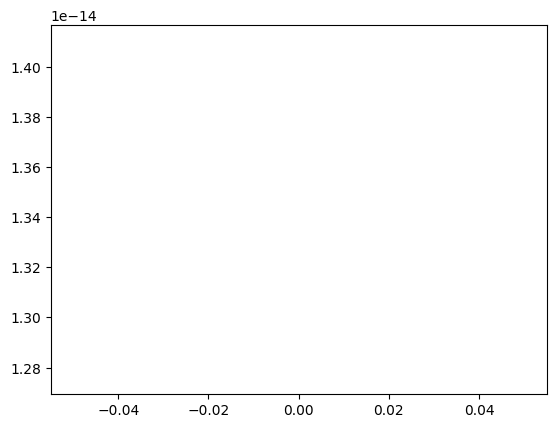

In [25]:
W = ortho_group.rvs(10) @ np.diag(np.random.normal(0, 1, 10)**2)
A,li = compute_procrustes.compute_procrustes(W)
plt.imshow(A.T @ A)
plt.colorbar()
plt.show()
plt.plot(li[:10])

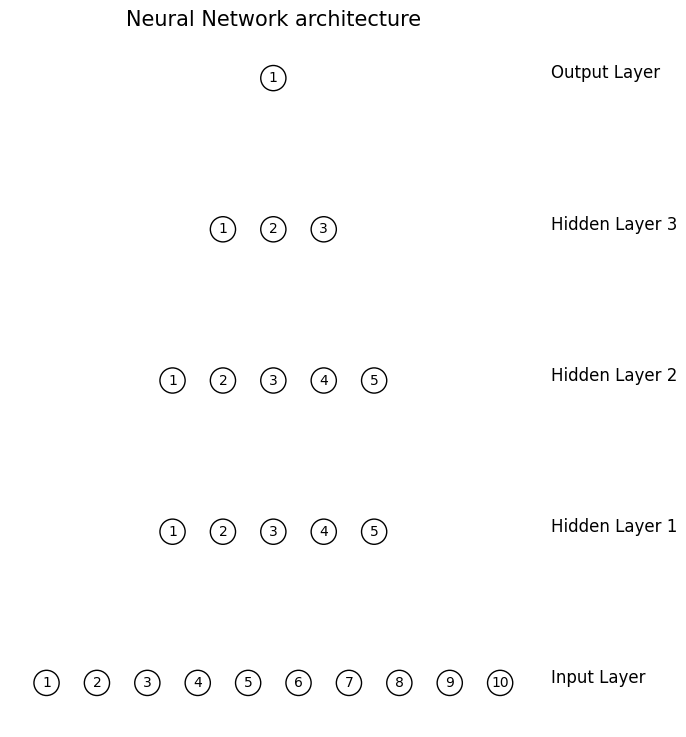

In [41]:
l = get_model_params(model)
network_structure = layer_sizes_list
network=VisNN.DrawNN(network_structure, l, 0.2, 10)
network.draw()